In [6]:
import numpy as np
import os
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt 
import seaborn as sns

#attributes/features
* buying - price of the car: vhigh, high, med, low
* maint - price of maintenance: vhigh, high, med, low
* doors - number of doors: 2, 3, 4, 5more
* persons - highest number of passengers that can be transported: 2, 4, more
* lug_boot - size of luggage compartment/boot: small, med, big
* safety - estimated safety of car: low, med, high
#label - car acceptibility:bad, acc

# Load Data

In [7]:
training_data = pd.read_csv("data/training_data.csv")
training_data

,cid,buying,maint,doors,persons,lug_boot,safety,label
0,0,vhigh,med,2,4,med,med,bad
1,1,low,med,3,4,small,high,acc
2,2,med,med,3,more,med,high,acc
3,3,med,low,4,2,big,med,bad
4,4,low,high,4,more,big,high,acc
...,...,...,...,...,...,...,...,...
295,295,vhigh,low,3,2,small,med,bad
296,296,vhigh,vhigh,5more,4,small,low,bad
297,297,med,vhigh,3,4,med,high,acc
298,298,high,high,4,4,med,high,acc


In [8]:
training_data = training_data.drop(['cid'],axis=1)
training_data.describe()

,buying,maint,doors,persons,lug_boot,safety,label
count,300,300,300,300,300,300,300
unique,4,4,4,3,3,3,2
top,low,low,2,more,big,high,bad
freq,115,92,85,114,113,131,150


In [9]:
training_data.label.value_counts()

label
bad    150
acc    150
Name: count, dtype: int64

# Data Preprocessing

In [10]:
y = training_data['label']
X = training_data.drop(['label'],axis=1)

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
296,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False
297,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False
298,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


In [12]:
# test_size
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
#If int, represents the absolute number of test samples.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 24)

In [13]:
X_train.shape, X_test.shape

((240, 15), (60, 15))

In [14]:
dt = tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 31
Max depth: 9


In [15]:
# print the scores on training and test set

print('Training set - Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set - Accuracy: {:.4f}'.format(dt.score(X_test, y_test)))

Training set - Accuracy: 1.0000
Test set - Accuracy: 0.9667


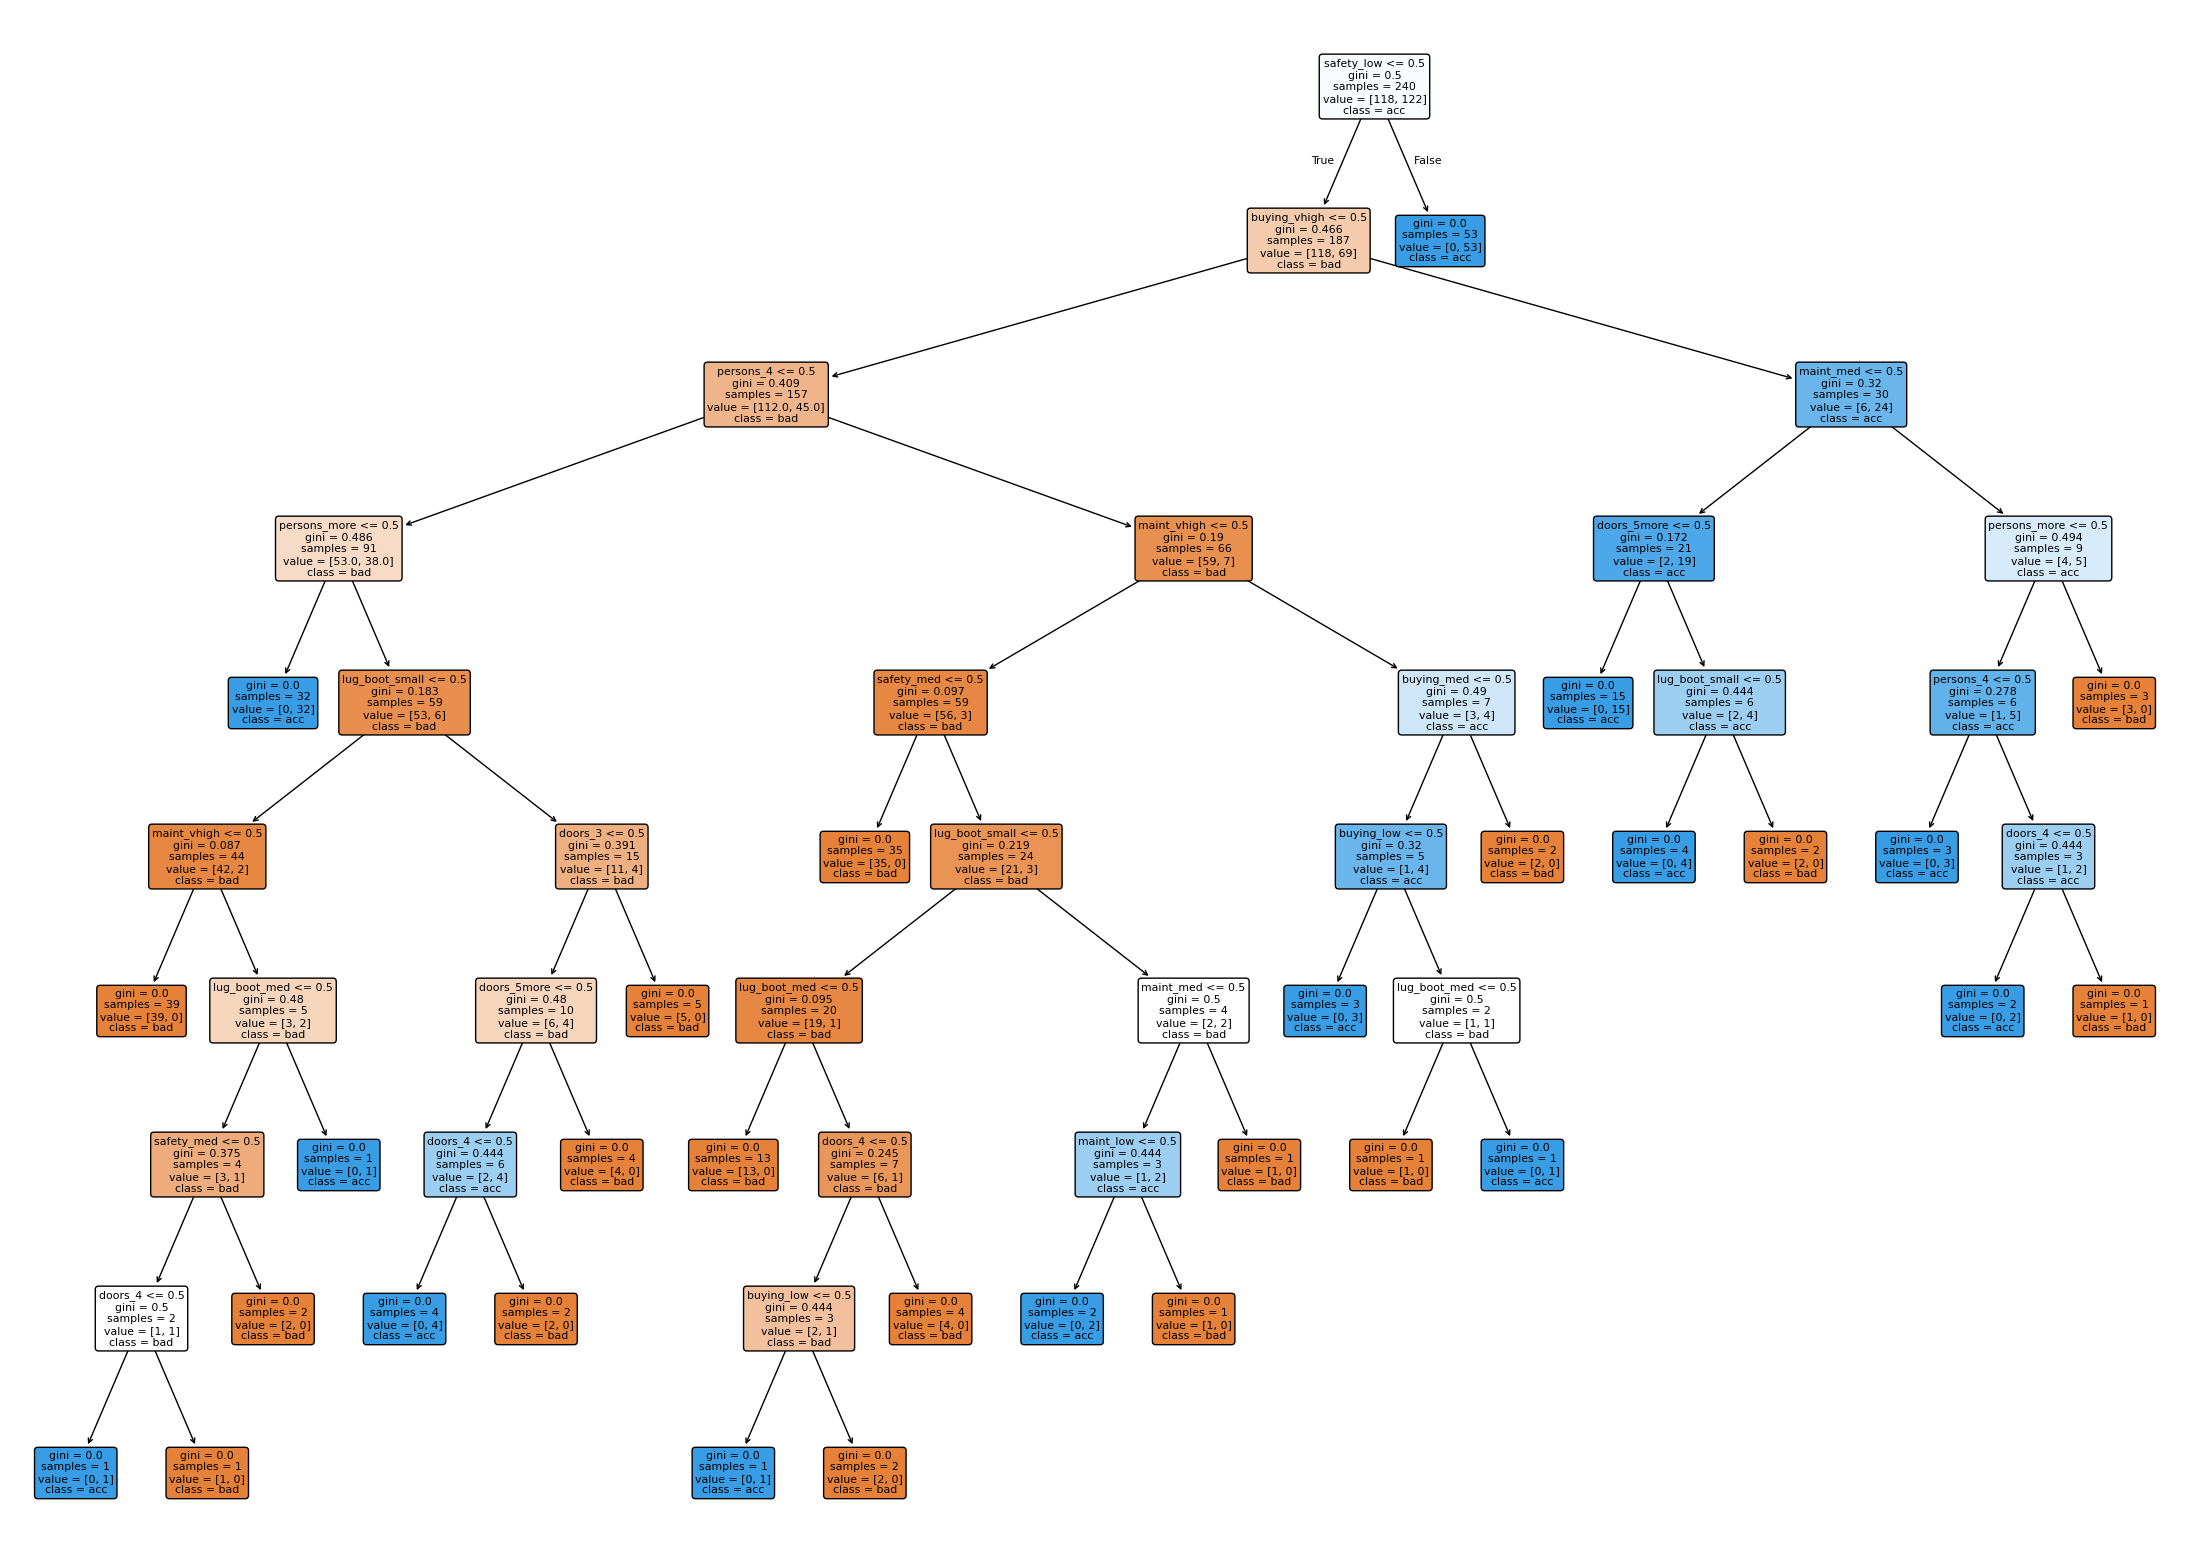

In [16]:
plt.figure(figsize=(28,20))
tree.plot_tree(dt.fit(X_train, y_train), 
               feature_names=X_encoded.columns,
               class_names=["bad","acc"],
               filled=True,
               rounded=True) 
plt.show()